In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix

['ML dataset.csv']


Using TensorFlow backend.


In [2]:
data = pd.read_csv("../input/ML dataset.csv")

In [3]:
data.isna().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
Class    0
dtype: int64

In [4]:
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 35
# fig_size[1] = 18
# data.hist(bins=20)

In [5]:
x = data.drop(['Class'], axis=1)
y = data['Class']

In [6]:
scaler = MinMaxScaler(feature_range=[0,1])
x = scaler.fit_transform(x)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
x_test.shape, x_train.shape,y_test.shape, y_train.shape

((450, 14), (1050, 14), (450,), (1050,))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

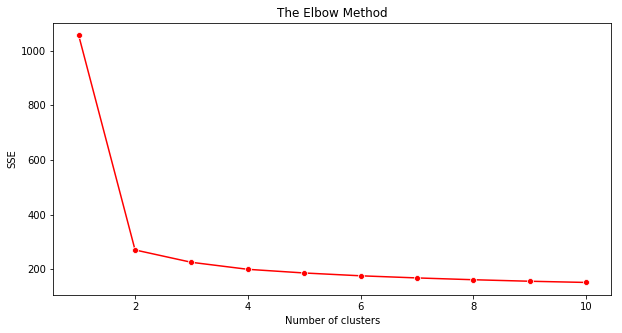

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter = 1000)
    kmeans.fit(x_train)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10,5))

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

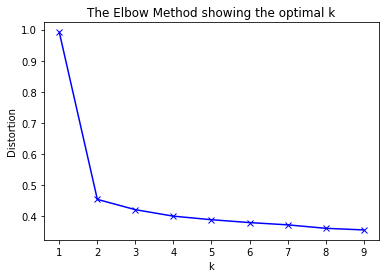

In [9]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 42,max_iter = 1000).fit(x_train)
    kmeanModel.fit(x_train)
    distortions.append(sum(np.min(cdist(x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6557738222146903
Accuracy Score  0.4222222222222222
Completeness Score  0.018616278739592717
For n_clusters = 3 The average silhouette_score is : 0.4899778252591826
Accuracy Score  0.3977777777777778
Completeness Score  0.012972740630896937
For n_clusters = 4 The average silhouette_score is : 0.4773380710787051
Accuracy Score  0.3688888888888889
Completeness Score  0.014225108156473276


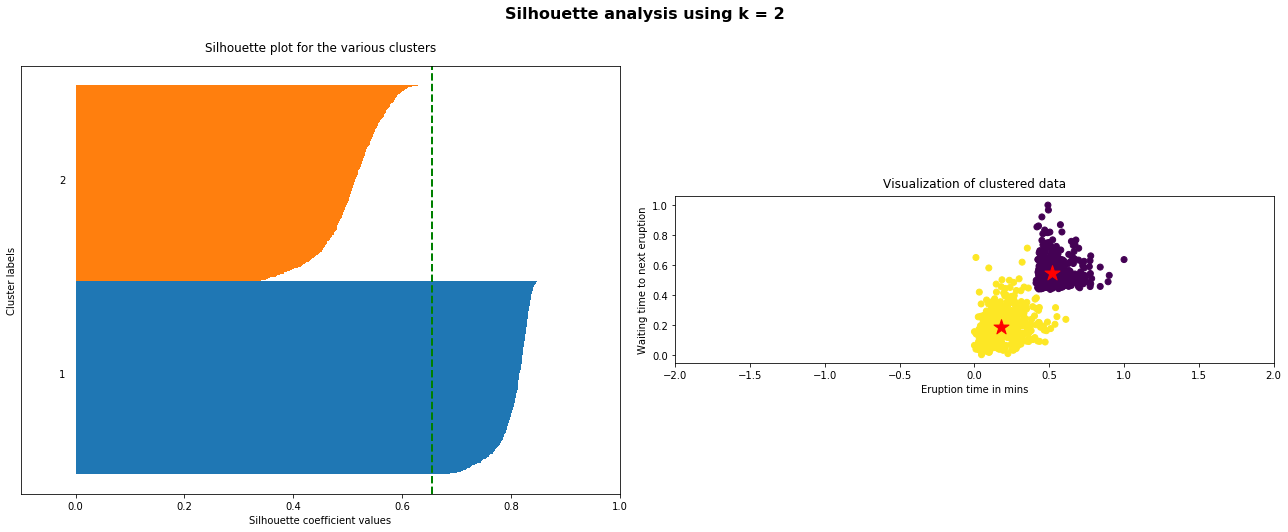

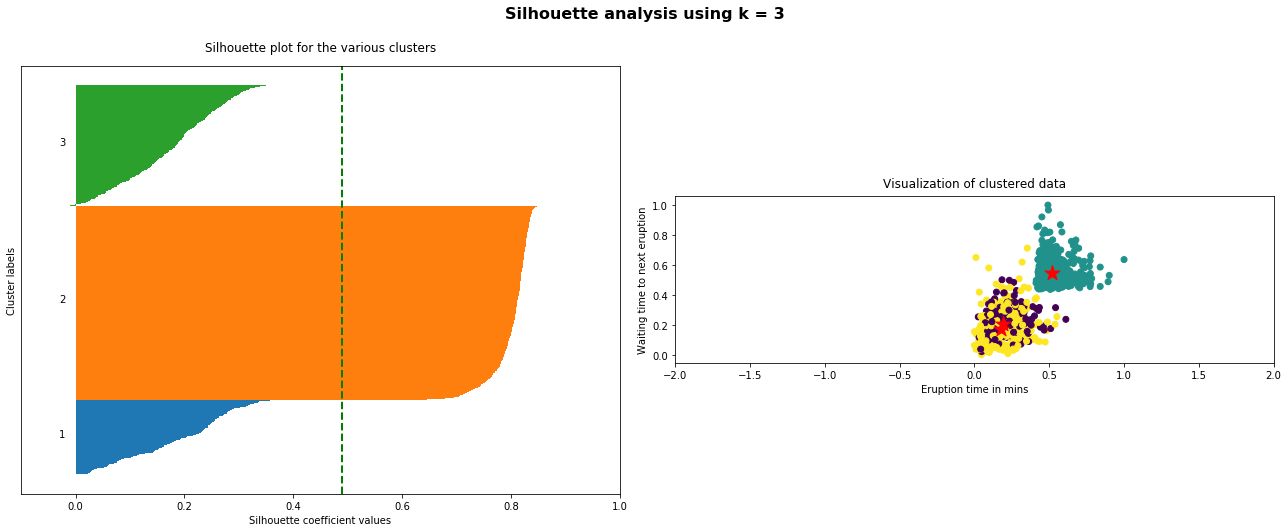

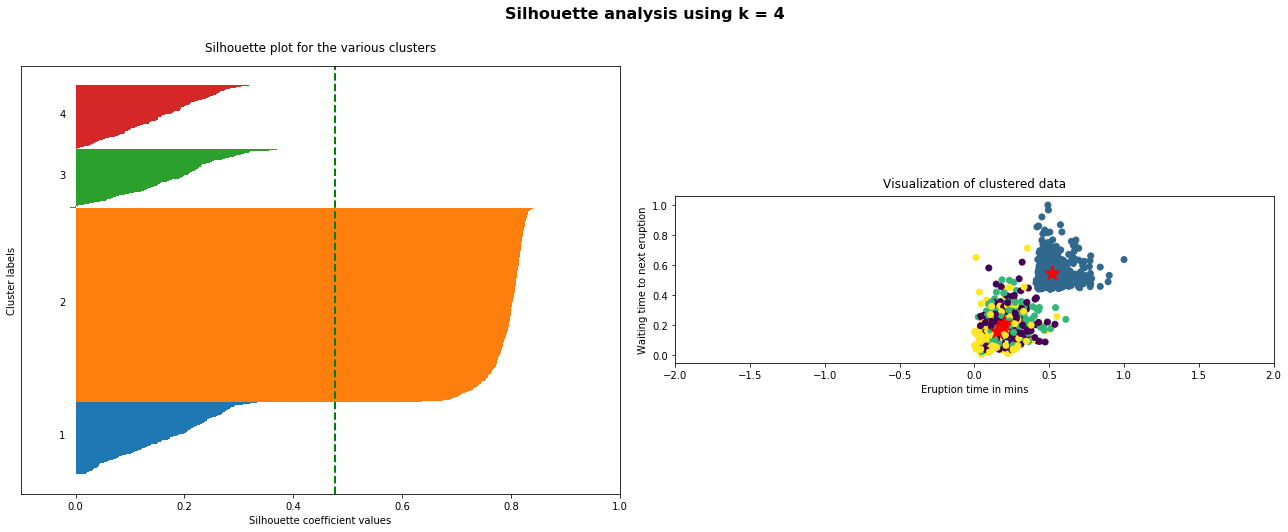

In [10]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, max_iter = 1000)
    labels = km.fit_predict(x_train)
    y_label_test = km.predict(x_test)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(x_train, labels)
    
    
    
    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(x_train[:, 0], x_train[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
   
    silhouette_avg = silhouette_score(x_train, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    #y_label_train = kmeans.labels_
    accurcyscore = accuracy_score(y_test,y_label_test)
    completenessscore =completeness_score(y_test, y_label_test)
    print("Accuracy Score ",accurcyscore)
    print("Completeness Score ",completenessscore)

In [16]:
input_data = Input(shape=(14,))
encoded = Dense(12, activation='relu')(input_data)
encoded = Dense(11, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoded = Dense(5, activation='relu')(encoded)

encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(5, activation='relu')(encoded)
decoded = Dense(10, activation='relu')(decoded)
decoded = Dense(11, activation='relu')(decoded)
decoded = Dense(12, activation='relu')(decoded)
decoded = Dense(14, activation='sigmoid')(decoded)

In [17]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1050 samples, validate on 450 samples
Epoch 1/40
1050/1050 [==============================] - 1s 955us/step - loss: 0.6917 - val_loss: 0.6893
Epoch 2/40
1050/1050 [==============================] - 0s 25us/step - loss: 0.6875 - val_loss: 0.6851
Epoch 3/40
1050/1050 [==============================] - 0s 27us/step - loss: 0.6831 - val_loss: 0.6807
Epoch 4/40
1050/1050 [==============================] - 0s 25us/step - loss: 0.6785 - val_loss: 0.6759
Epoch 5/40
1050/1050 [==============================] - 0s 23us/step - loss: 0.6735 - val_loss: 0.6708
Epoch 6/40
1050/1050 [==============================] - 0s 26us/step - loss: 0.6682 - val_loss: 0.6656
Epoch 7/40
1050/1050 [==============================] - 0s 25us/step - loss: 0.6631 - val_loss: 0.6606
Epoch 8/40
1050/1050 [==============================] - 0s 24us/step - loss: 0.6586 - val_loss: 0.6566
Epoch 9/40
1050/1050 [==============================] - 0s 23us/step - loss: 0.6550 - val_loss: 0.6532
Epoch 10/40
1050/1050 [==

In [18]:
encoder = Model(input_data, encoded)

In [19]:
reduced_x_train = encoder.predict(x_train)
reduced_x_test = encoder.predict(x_test)

In [20]:
reduced_x_train.shape, reduced_x_test.shape

((1050, 2), (450, 2))

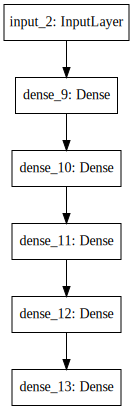

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(encoder).create(prog='dot', format='svg'))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

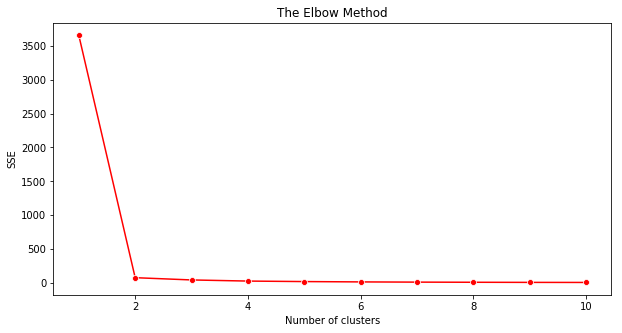

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter = 1000)
    kmeans.fit(reduced_x_train)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10,5))

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

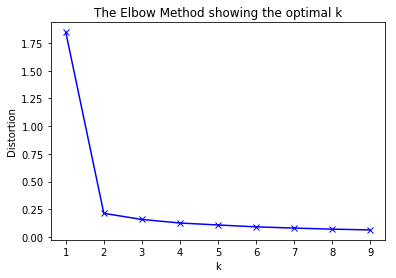

In [23]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 42,max_iter = 1000).fit(reduced_x_train)
    kmeanModel.fit(reduced_x_train)
    distortions.append(sum(np.min(cdist(reduced_x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / reduced_x_train.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9184054
Accuracy Score  0.5777777777777777
Completeness Score  0.018616278739592717
For n_clusters = 3 The average silhouette_score is : 0.76399624
Accuracy Score  0.4688888888888889
Completeness Score  0.016406774972331273
For n_clusters = 4 The average silhouette_score is : 0.58217096
Accuracy Score  0.27555555555555555
Completeness Score  0.012894044864727764


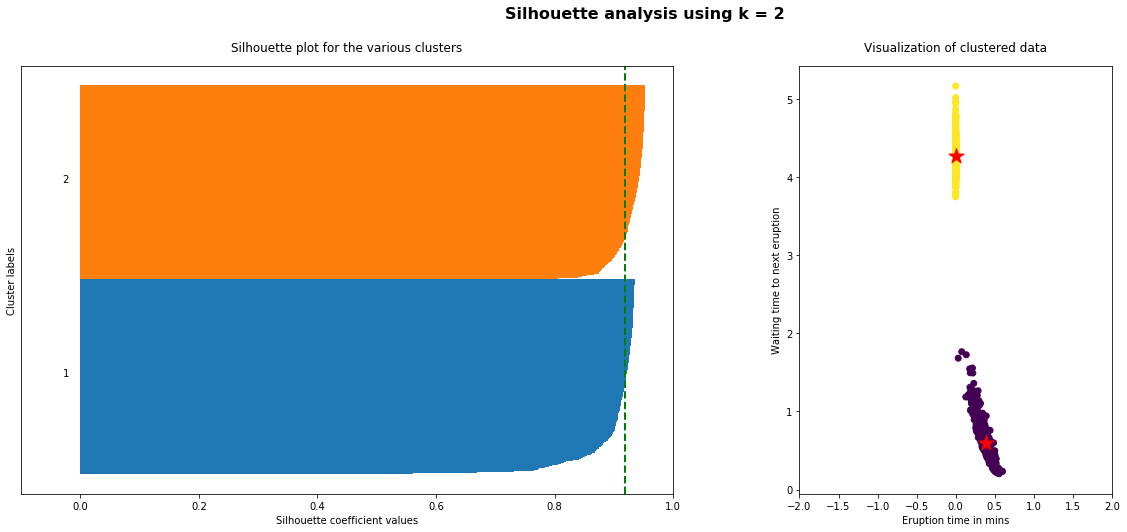

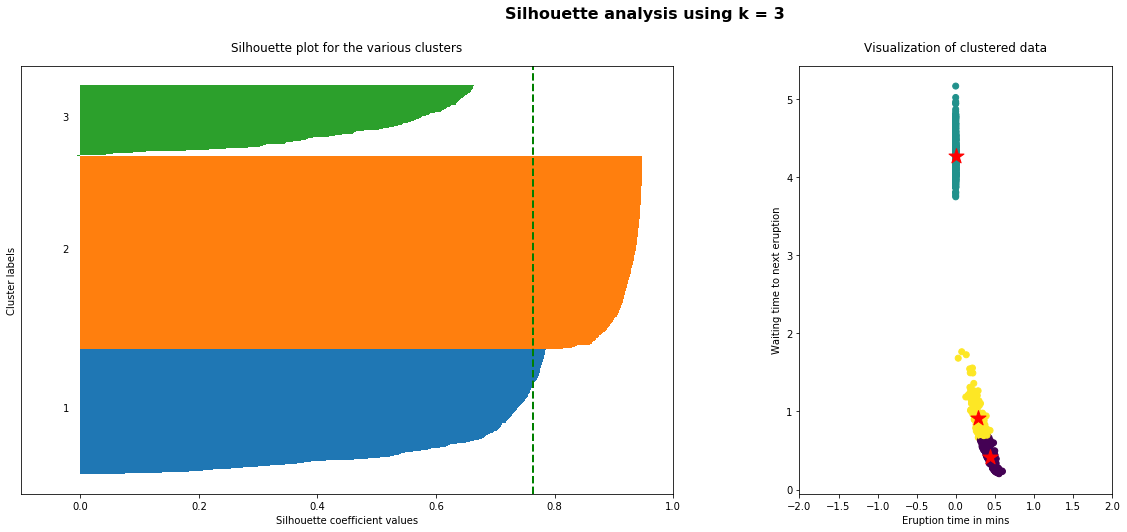

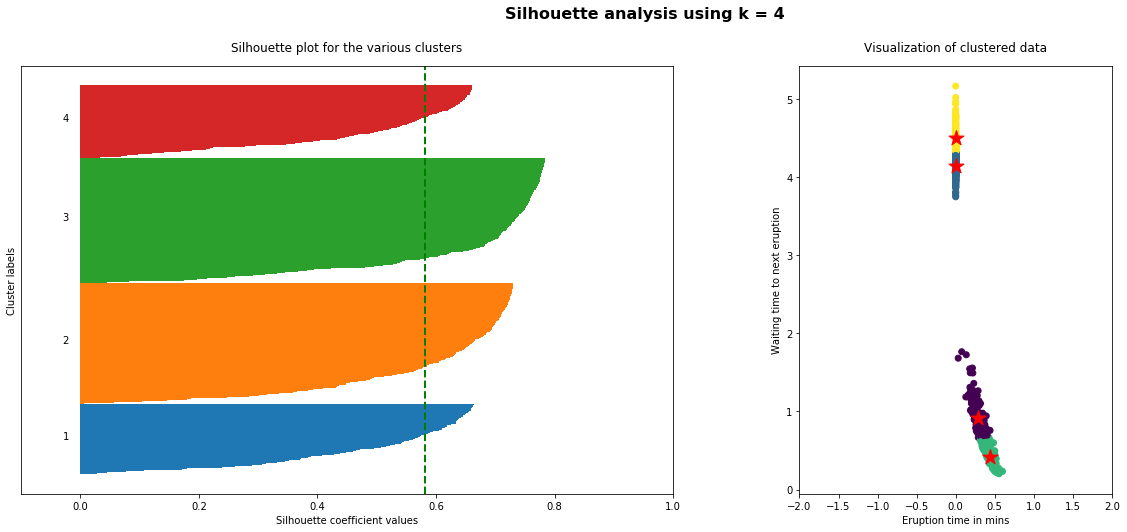

In [24]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, max_iter = 1000)
    labels = km.fit_predict(reduced_x_train)
    y_label_test = km.predict(reduced_x_test)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(reduced_x_train, labels)
    
    
    
    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(reduced_x_train[:, 0], reduced_x_train[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
   
    silhouette_avg = silhouette_score(reduced_x_train, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    #y_label_train = kmeans.labels_
    accurcyscore = accuracy_score(y_test,y_label_test)
    completenessscore =completeness_score(y_test, y_label_test)
    print("Accuracy Score ",accurcyscore)
    print("Completeness Score ",completenessscore)

In [25]:
input_data = Input(shape=(14,))
encoded = Dense(12, activation='relu')(input_data)
encoded = Dense(11, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoded = Dense(5, activation='relu')(encoded)

encoded = Dense(2, activation='softmax')(encoded)

decoded = Dense(5, activation='relu')(encoded)
decoded = Dense(10, activation='relu')(decoded)
decoded = Dense(11, activation='relu')(decoded)
decoded = Dense(12, activation='relu')(decoded)
decoded = Dense(14, activation='sigmoid')(decoded)




In [28]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1050 samples, validate on 450 samples
Epoch 1/40
1050/1050 [==============================] - 1s 1ms/step - loss: 0.6477 - val_loss: 0.6454
Epoch 2/40
1050/1050 [==============================] - 0s 25us/step - loss: 0.6463 - val_loss: 0.6431
Epoch 3/40
1050/1050 [==============================] - 0s 24us/step - loss: 0.6441 - val_loss: 0.6401
Epoch 4/40
1050/1050 [==============================] - 0s 26us/step - loss: 0.6402 - val_loss: 0.6345
Epoch 5/40
1050/1050 [==============================] - 0s 25us/step - loss: 0.6335 - val_loss: 0.6246
Epoch 6/40
1050/1050 [==============================] - 0s 27us/step - loss: 0.6221 - val_loss: 0.6090
Epoch 7/40
1050/1050 [==============================] - 0s 23us/step - loss: 0.6054 - val_loss: 0.5895
Epoch 8/40
1050/1050 [==============================] - 0s 25us/step - loss: 0.5870 - val_loss: 0.5720
Epoch 9/40
1050/1050 [==============================] - 0s 24us/step - loss: 0.5714 - val_loss: 0.5588
Epoch 10/40
1050/1050 [====

In [29]:
encoder = Model(input_data, encoded)

In [30]:
reduced_x_train = encoder.predict(x_train)
reduced_x_test = encoder.predict(x_test)

In [31]:
reduced_x_train.shape, reduced_x_test.shape

((1050, 2), (450, 2))

In [32]:
predict_clusters = np.argmax(reduced_x_test, axis=1)

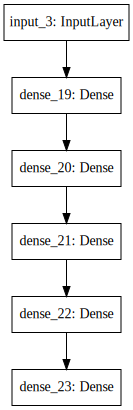

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(encoder).create(prog='dot', format='svg'))

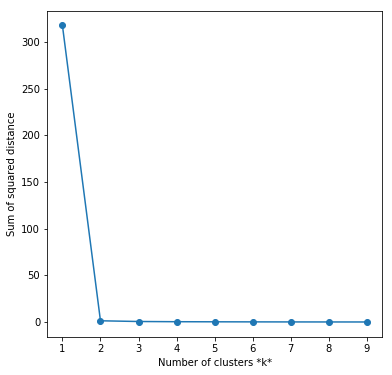

In [34]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(reduced_x_train)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

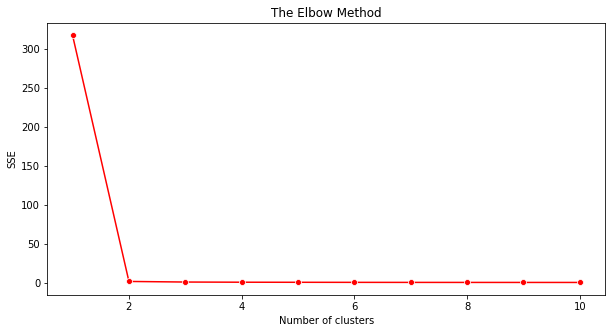

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter = 1000)
    kmeans.fit(reduced_x_train)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10,5))

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

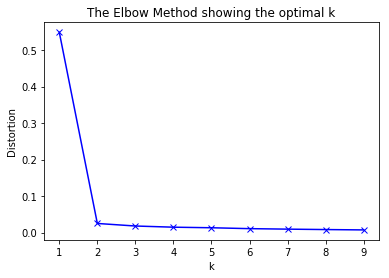

In [36]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 42,max_iter = 1000).fit(reduced_x_train)
    kmeanModel.fit(reduced_x_train)
    distortions.append(sum(np.min(cdist(reduced_x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / reduced_x_train.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9676582
Accuracy Score  0.5777777777777777
Completeness Score  0.018616278739592717
For n_clusters = 3 The average silhouette_score is : 0.7819454
Accuracy Score  0.38
Completeness Score  0.019247848227166697
For n_clusters = 4 The average silhouette_score is : 0.76485074
Accuracy Score  0.31333333333333335
Completeness Score  0.022637581404991468


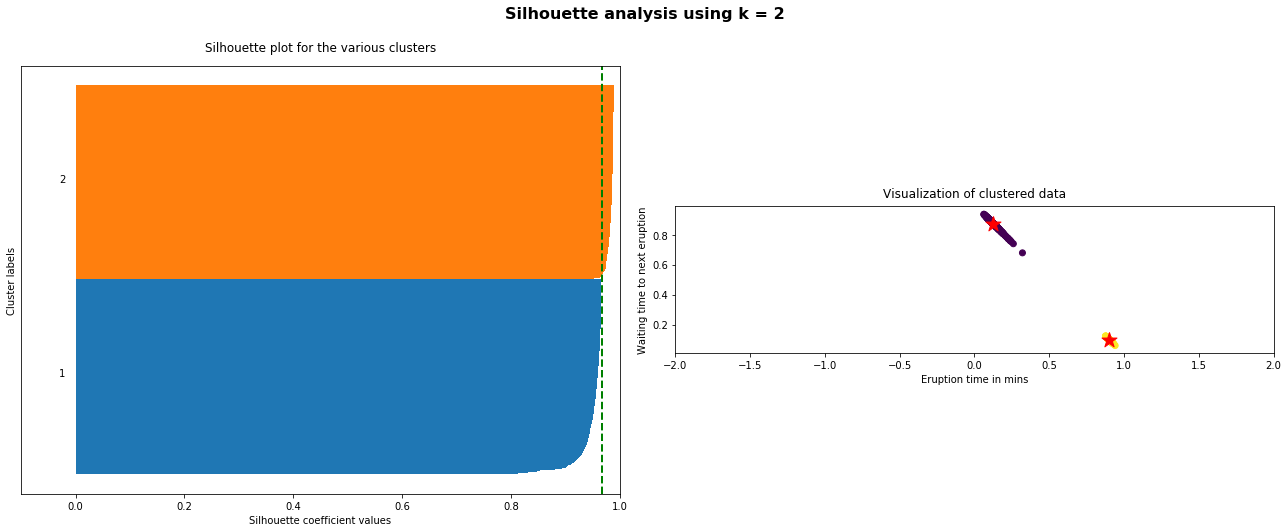

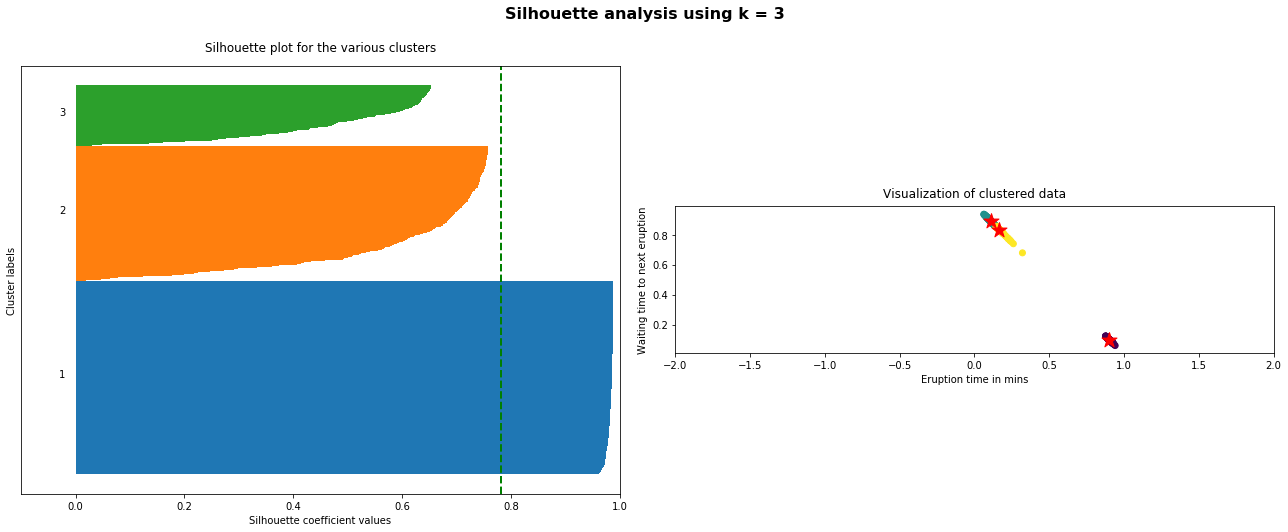

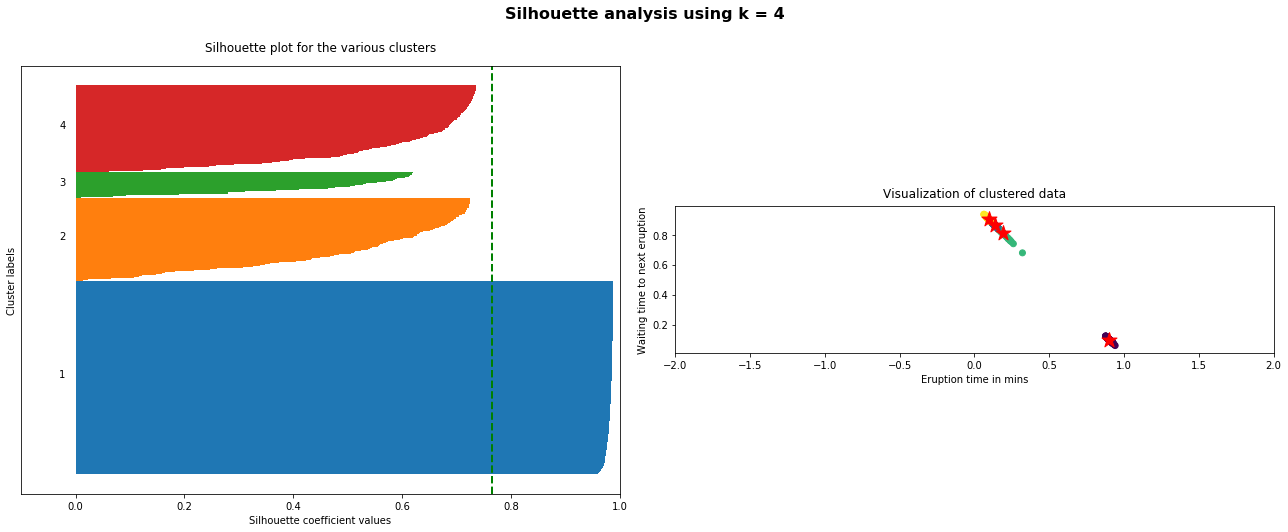

In [37]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, max_iter = 1000)
    labels = km.fit_predict(reduced_x_train)
    y_label_test = km.predict(reduced_x_test)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(reduced_x_train, labels)
    
    
    
    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(reduced_x_train[:, 0], reduced_x_train[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
   
    silhouette_avg = silhouette_score(reduced_x_train, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    #y_label_train = kmeans.labels_
    accurcyscore = accuracy_score(y_test,y_label_test)
    completenessscore =completeness_score(y_test, y_label_test)
    print("Accuracy Score ",accurcyscore)
    print("Completeness Score ",completenessscore)